In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Number of simulations and permutations
simulation=1000
permutation_number=1000
# Range of sample sizes to test, from 5 to 100 in steps of 5
N=np.arange(5,105,5)
# Probabilities for control and treatment groups
p_c=0.5
p_v=0.1
# Significance level
alpha=0.05
# Initialize a list to store power values
power_values=[]

# Loop over different sample sizes
for n in N:
     # Counter for significant results
    count=0
     # Run simulations
    for s in range(simulation):
        # Generate random samples for control and treatment groups
        control_sample=np.random.binomial(1, p_c, n)
        treat_sample=np.random.binomial(1,p_v,n)
         # Calculate observed difference in means
        ob_diff=np.mean(control_sample)-np.mean(treat_sample)
        # Combine samples for permutation
        together=np.concatenate([control_sample, treat_sample])
        differences=np.zeros(permutation_number)
        # Permutation test
        for k in range(permutation_number):
            per_together=together
            np.random.shuffle(per_together)# Copy combined array for shuffling
            per_control=per_together[:n] # Permutation control sample
            per_treat=per_together[n:] # Permutation treatment sample
            # Calculate difference for this permutation
            differences[k]=per_control.mean()-per_treat.mean()
        # Calculate p-value
        pvalue=np.sum(differences>=ob_diff)/differences.size
         # Count how many simulations are significant
        if pvalue<alpha:
            count+=1   
    # Calculate power and add to list
    power=count/simulation
    power_values.append(power)




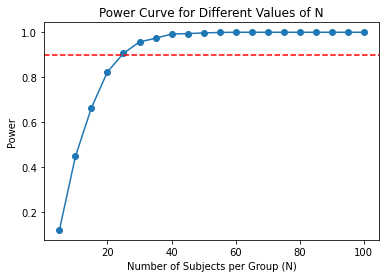

In [52]:
#Make plot for the result
plt.plot(N, power_values, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('Number of Subjects per Group (N)')
plt.ylabel('Power')
plt.title('Power Curve for Different Values of N')
plt.show()


**From the figure before, we can detect that the N value is between 20-30, thus we can specify those numbers within this region.**

In [55]:
# Number of simulations and permutations
simulation=1000
permutation_number=1000
# Range of sample sizes to test, from 5 to 100 in steps of 5
N=np.arange(20,31,1)
# Probabilities for control and treatment groups
p_c=0.5
p_v=0.1
# Significance level
alpha=0.05
# Initialize a list to store power values
power_values=[]

# Loop over different sample sizes
for n in N:
     # Counter for significant results
    count=0
     # Run simulations
    for s in range(simulation):
        # Generate random samples for control and treatment groups
        control_sample=np.random.binomial(1, p_c, n)
        treat_sample=np.random.binomial(1,p_v,n)
         # Calculate observed difference in means
        ob_diff=np.mean(control_sample)-np.mean(treat_sample)
        # Combine samples for permutation
        together=np.concatenate([control_sample, treat_sample])
        differences=np.zeros(permutation_number)
        # Permutation test
        for k in range(permutation_number):
            per_together=together
            np.random.shuffle(per_together)# Copy combined array for shuffling
            per_control=per_together[:n] # Permutation control sample
            per_treat=per_together[n:] # Permutation treatment sample
            # Calculate difference for this permutation
            differences[k]=per_control.mean()-per_treat.mean()
        # Calculate p-value
        pvalue=np.sum(differences>=ob_diff)/differences.size
         # Count how many simulations are significant
        if pvalue<alpha:
            count+=1   
    # Calculate power and add to list
    power=count/simulation
    power_values.append(power)


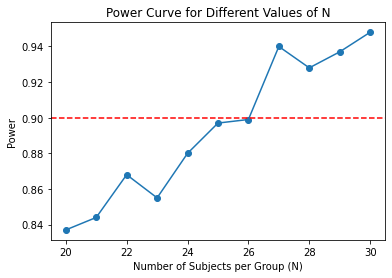

In [56]:
#Make plot for the result
plt.plot(N, power_values, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('Number of Subjects per Group (N)')
plt.ylabel('Power')
plt.title('Power Curve for Different Values of N')
plt.show()

**From the plot we can see that the accurte number that ensure us have approximately 90% chance of seeing a difference between
the control and treatment arms that is significant at α = 0.05 level is around 26.  
Thus if we Choose N around this number, we can have approximately 90% chance of seeing a difference between
the control and treatment arms that is significant at α = 0.05 level.**